# Reproduce all plots

The plots show in order 
1) EML learning curve for $\mathcal{P} = 42$ using the Coulomb matrix and FCHL19 representations
2) Prediction time $t$ in hours
3) Numerical error $\Delta$ versus training set size $N$
4) Numerical error $\Delta$ versus $\mathcal{P} $
5) Learning curves for various different values of  $\mathcal{P} $
6) Prediction time $t$ versus   $\mathcal{P} $
7) Prediction time $t$ versus  $L$ the molecular representation length

too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed
too many indices for array: array is 1-dimensional, but 2 were indexed


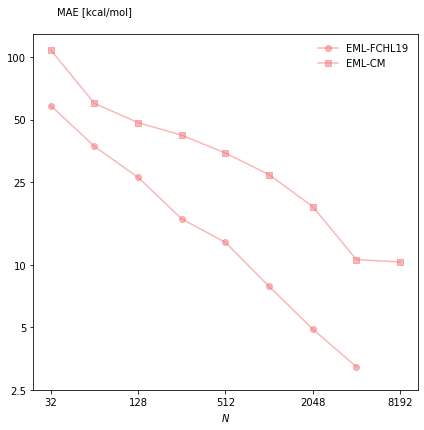

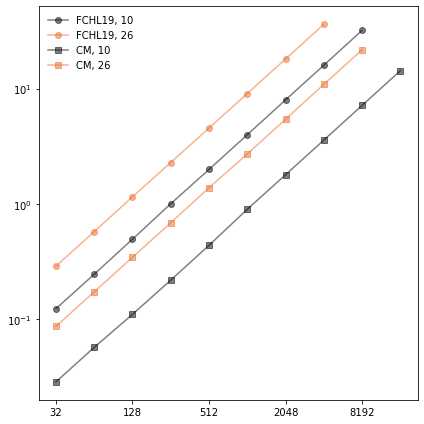

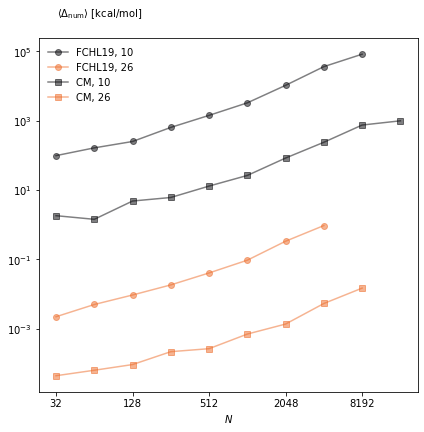

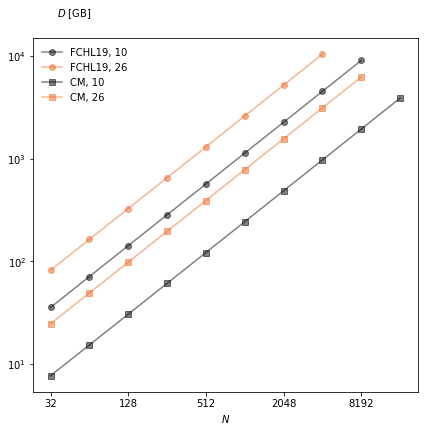

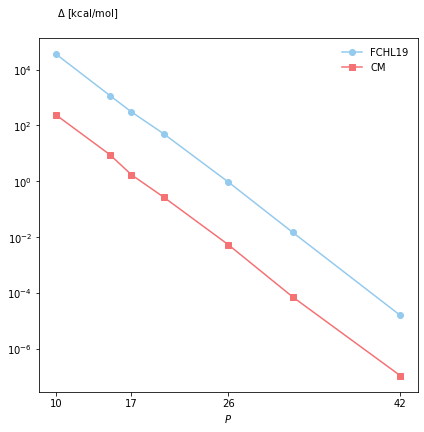

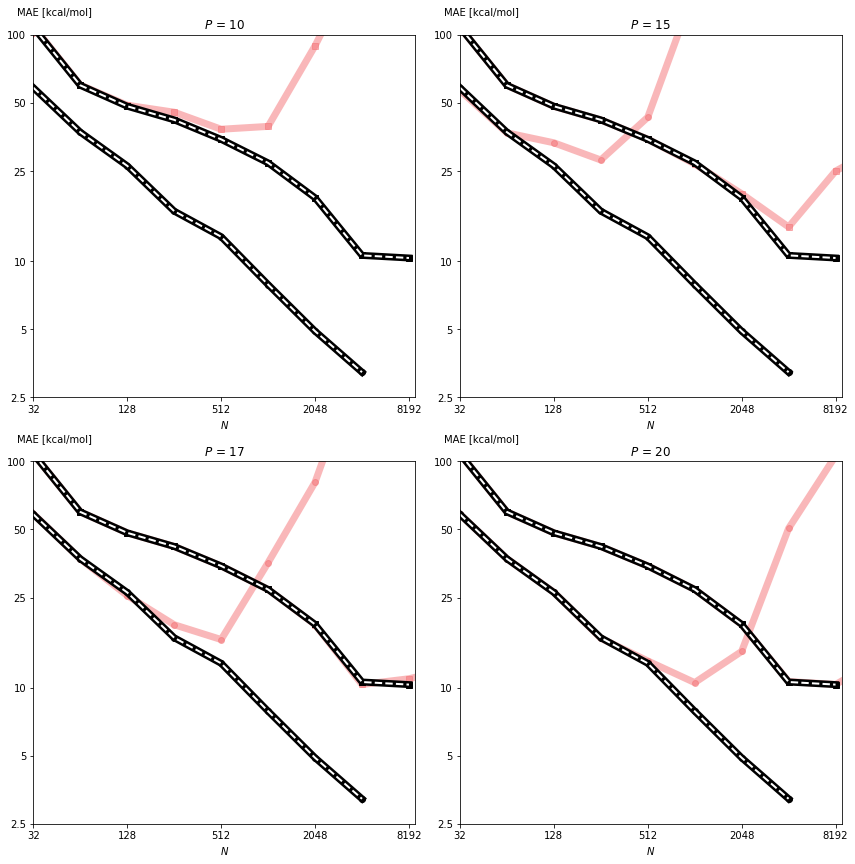

In [1]:
""" 
PLOT CYPTO-ML VERSUS PYTHON LEARNING CURVES ON QM9 
AS WELL AS NUMERICAL DEVIATION, PREDICTION TIME AND 
TRANSFERRED DATA
""" 
import numpy as np
from lib_parse import *


nticks = [32, 128 , 512, 2048, 8192]
A_lvls =  [10, 15, 17, 20, 26, 32, 42]
reps = ["FCHL19", "CM"]
final_devs = []

f1, axs1 = plt.subplots(1, 1, figsize=(6, 6))


f2, axs2 = plt.subplots(1, 1, figsize=(6, 6))
f3, axs3 = plt.subplots(1, 1, figsize=(6, 6))
f4, axs4 = plt.subplots(1, 1, figsize=(6, 6))
f5, axs5 = plt.subplots(1, 1, figsize=(6, 6))
f7, axs7 = plt.subplots(2, 2, figsize=(12, 12))
colors = plt.cm.inferno(np.linspace(0, 1, len(A_lvls)))



final_times = []
for i, rep in enumerate(reps):
    
    curr_devs = []
    final_times_N = []
    for j, A in enumerate(A_lvls):       
        
        n_lc,num_std, num_devs, times, traffics, crypto_pred, cryto_lc, python_lc = extract_crpto(
                rep, A, './results', True)

        #convert all the arrays from ha to kcal/mol
        
        num_std, num_devs, crypto_pred, cryto_lc, python_lc =num_std*ha2kcal, num_devs*ha2kcal, crypto_pred*ha2kcal, cryto_lc*ha2kcal, python_lc*ha2kcal
        final_times_N.append(times[7])

        if A==42:

            
            axs1.plot(n_lc, cryto_lc, color=SOFTRED.format(
                i), marker=mrkcyc[i],  alpha=alpha, label="EML-"+"{}".format(rep))

        
        if (j%4)==0:
            axs2.plot(n_lc, times/(60*60), marker=mrkcyc[i], color=colors[j], alpha=alpha, label="{}, {}".format(rep, A))
    
            axs3.plot(n_lc, num_devs, marker=mrkcyc[i],color = colors[j], alpha=alpha, label="{}, {}".format(rep, A))

        
            axs4.plot(n_lc, traffics/1e3, marker=mrkcyc[i], 
                    color=colors[j], alpha=alpha, label="{}, {}".format(rep, A))
        

        if A==10:
            axs7[0][0].set_title("$P$ = {}".format(A))
            axs7[0][0].plot(n_lc, cryto_lc,marker=mrkcyc[i],lw=7, color=SOFTRED,alpha=alpha)
           
        if A==15:
            axs7[0][1].set_title("$P$ = {}".format(A))
            axs7[0][1].plot(n_lc, cryto_lc,marker=mrkcyc[i],lw=7, color=SOFTRED,alpha=alpha)
        if A==17:
            axs7[1][0].set_title("$P$ = {}".format(A))
            axs7[1][0].plot(n_lc, cryto_lc,marker=mrkcyc[i],lw=7, color=SOFTRED,alpha=alpha)
        if A==20:
            axs7[1][1].set_title("$P$ = {}".format(A))
            axs7[1][1].plot(n_lc, cryto_lc,marker=mrkcyc[i], color=SOFTRED, lw=7, alpha=alpha,label="Crypto-"+"{}".format(rep))
        
        for ii in [0,1]:
            for jj in [0,1]:
                 
                 if A==42:
                    axs7[ii][jj].plot(n_lc, cryto_lc, color='black',mec='black', marker=mrkcyc[i], lw=7, label="EML-"+"{}".format(rep))
                    axs7[ii][jj].plot(n_lc, python_lc[:len(n_lc)], color="white", mec='white',lw=2 ,marker=None, ls ="--" ,label="QML-"+"{}".format(rep))
                    axs7[ii][jj].set_xlim(32,9000)
                    axs7[ii][jj].set_ylim(2.5,200)
            
        

        curr_devs.append(num_devs[7])

    final_devs.append(curr_devs)
    final_times.append(final_times_N)




for a in [axs1, axs2, axs3, axs4]:

    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xticks(nticks)
    a.set_xticklabels(nticks)
    a.get_xaxis().set_tick_params(which='minor', size=0)
    a.get_xaxis().set_tick_params(which='minor', width=0) 
    a.get_yaxis().set_tick_params(which='minor', size=0)
    a.get_yaxis().set_tick_params(which='minor', width=0) 

    a.minorticks_off()


yticks1 = [100, 50, 25, 10, 5, 2.5]

for a in axs7.flatten():
    a.set_xlabel('$N$')
    a.set_ylabel('MAE [kcal/mol]'   ,rotation=0, ha="left", y=1.05, labelpad=-10, weight=500)
    a.set_xscale('log')
    a.set_yscale('log')

    a.set_yticks(yticks1)
    a.set_yticklabels(yticks1)
    a.set_xticks(nticks)
    a.set_xticklabels(nticks)
    a.set_ylim(2.5 , 100)
    a.get_xaxis().set_tick_params(which='minor', size=0)
    a.get_xaxis().set_tick_params(which='minor', width=0) 
    a.get_yaxis().set_tick_params(which='minor', size=0)
    a.get_yaxis().set_tick_params(which='minor', width=0) 
    a.minorticks_off()


axs1.set_yticks(yticks1)
axs1.set_yticklabels(yticks1)
axs1.set_xlabel('$N$')
axs1.set_ylabel('MAE [kcal/mol]',rotation=0, ha="left", y=1.05, labelpad=-50, weight=500)


axs3.set_ylabel(r"$\langle \Delta_{\rm num} \rangle$" + " [kcal/mol]",rotation=0, ha="left", y=1.05, labelpad=-50, weight=500)
axs3.set_xlabel('$N$')


axs4.set_ylabel('$D$'+' [GB]',rotation=0, ha="left", y=1.05, labelpad=-50, weight=500)
axs4.set_xlabel('$N$')

axs5.set_yscale('log')
axs5.set_xticks(A_lvls[::2])
axs5.set_xticklabels(A_lvls[::2])



for i, rep in enumerate(reps):
    axs5.plot(A_lvls, final_devs[i], color=SOFTCOLORS[i], marker=mrkcyc[i], label=rep)

axs5.set_ylabel(r"$ \Delta $" + " [kcal/mol]",rotation=0, ha="left", y=1.05, labelpad=-50, weight=500)
axs5.set_xlabel('$P$')

axs1.legend(ncol=1, frameon=False)
axs2.legend(ncol=1, frameon=False)
axs3.legend(ncol=1, frameon=False)
axs4.legend(ncol=1, frameon=False)
axs5.legend(ncol=1, frameon=False)


for f in  [f1, f2, f3, f4, f5, f7]:
    f.tight_layout()

f1.savefig("./figures/eml_lrn_crv.pdf")
f2.savefig("./figures/eml_rep_timing.pdf")
f3.savefig("./figures/eml_num_dev.pdf")
f4.savefig("./figures/eml_data_trns.pdf")
f5.savefig("./figures/eml_accuracy.pdf")
f7.savefig("./figures/eml_lrn_crv_A.svg")


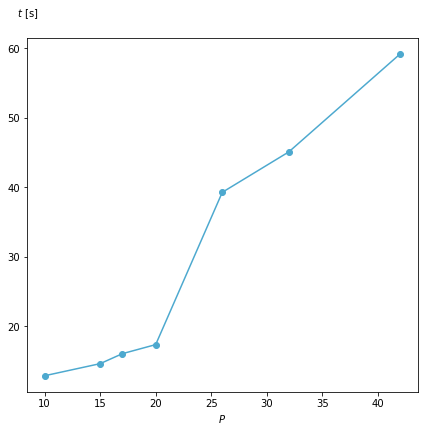

In [2]:
#fixed N =  n_lc[6] = 2048,  can be shown for fhcl19 and CM, with this can replace qm7 figure completely
f11, axs11 = plt.subplots(1, 1, figsize=(6, 6))
final_times = np.array(final_times)
axs11.plot([10, 15, 17, 20, 26, 32, 42],final_times[1]/1e3, "-o" )

axs11.get_xaxis().set_tick_params(which='minor', size=0)
axs11.get_xaxis().set_tick_params(which='minor', width=0) 
axs11.get_yaxis().set_tick_params(which='minor', size=0)
axs11.get_yaxis().set_tick_params(which='minor', width=0) 



axs11.set_xlabel('$P$')
axs11.set_ylabel('$t$ [s]'   ,rotation=0, ha="left", y=1.05, labelpad=-10, weight=500)
f11.tight_layout()

f11.savefig("./figures/TvsA.pdf")


<ipython-input-3-c572b7e8a3ea>:35: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f7.savefig("./figures/eml_len_rep.pdf")


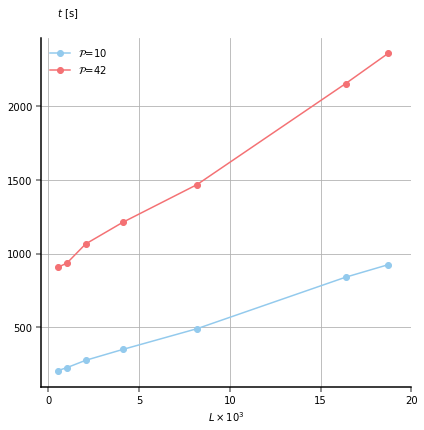

In [3]:
from scipy import stats

A_lvls = [10, 42]



f7 = plt.figure(constrained_layout=True, figsize=(6,6))
f7.add_gridspec(1, 1)
axs7 = f7.add_subplot()
axs7.grid()
fix_axes(axs7)

colors = plt.cm.inferno(np.linspace(0, 1, len(A_lvls)))

final_times_A = []
slopes = []

colors = []
for j, A in enumerate(A_lvls):
    res, n_rep =  get_crypto_single(f"./results/L/results/FCHL19/{A}")    
    slope, intercept, r_value, p_value, std_err = stats.linregress(n_rep, res[1])
    slopes.append(slope/A)


    axs7.plot ( n_rep[4:], res[1][4:], "o-",color=SOFTCOLORS[j], label="$\\mathcal{P}$"+f"={A}")
    final_times_A.append(res[1][-1])

axs7.set_xticks([0,5000, 10000,15000, 20000])
axs7.set_xticklabels([0,5, 10,15, 20])
axs7.set_ylabel('$t$'+' [s]',rotation=0, ha="left", y=1.05, labelpad=-50, weight=500)
axs7.set_xlabel('$L \\times 10^{3}$')
axs7.legend(ncol=1, frameon=False)

f7.set_tight_layout(True)
f7.savefig("./figures/eml_len_rep.pdf")
f7.savefig("./figures/eml_len_rep.svg")